<a href="https://colab.research.google.com/github/N-Tsuruta/SSD_TSG/blob/own_image_training/SSD%E5%AD%A6%E7%BF%92%E8%87%AA%E5%89%8D%E7%94%BB%E5%83%8F%E3%81%AE%E3%81%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import platform
print('python: {}.{}.{}'.format(
    platform.python_version_tuple()[0],
    platform.python_version_tuple()[1],
    platform.python_version_tuple()[2]))

import tensorflow as tf
print("tensorflow: " + tf.__version__)

import keras
print("keras: " + keras.__version__)

import scipy
print("scipy " + scipy.__version__)

# output
# python: 3.6.9
# tensorflow: 2.4.0
# keras: 2.4.3
# scipy 1.4.1

python: 3.7.14
tensorflow: 2.8.2
keras: 2.8.0
scipy 1.7.3


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip uninstall tensorflow scipy

Found existing installation: tensorflow 2.8.2+zzzcolab20220929150707
Uninstalling tensorflow-2.8.2+zzzcolab20220929150707:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220929150707.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220929150707
Found existing installation: scipy 1.7.3
Uninstalling scipy-1.7.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.7.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/scipy.libs/libopenblasp-r0-2d23e62b.3.17.so
    /usr/local/lib/pytho

tensorflow 1系では、cpu版とGPU版が分かれていた。

In [4]:
pip install tensorflow-gpu==1.13.1 keras==1.2.2 scipy==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 345.0 MB 3.8 kB/s 
     |████████████████████████████████| 175 kB 71.7 MB/s 
     |████████████████████████████████| 26.6 MB 1.4 MB/s 
     |████████████████████████████████| 3.2 MB 60.9 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 367 kB 76.2 MB/s 
     |████████████████████████████████| 2.8 MB 74.6 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=93e5b23a897b374f13d69cde2979278706cd2300aa3bb933119af21c36c5ad85
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=81a520f0bc8e5f59466680ce594a727a4f4630218b1138a97850076ae41293b8
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151

# Google Driveをマウントする。Google Driveには、ssd_keras-master.zip、VOCtrainval_06-Nov-2007.tar、weights_SSD300.hdf5をアップロードしておくこと

In [5]:
# %cd /content/drive/MyDrive/
# %unar ssd_keras-master.zip
%cd /content/drive/MyDrive/ssd_keras-master

/content/drive/MyDrive/ssd_keras-master


In [4]:
import keras
from keras.applications.imagenet_utils import preprocess_input
#from keras.backend.tensorflow_backend import set_session
from keras.backend import tensorflow_backend
from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
#from scipy.misc import imread
import tensorflow as tf

from ssd import SSD300
from ssd_utils import BBoxUtility

import imageio

voc_classes = ['Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle',
               'Bus', 'Car', 'Cat', 'Chair', 'Cow', 'Diningtable',
               'Dog', 'Horse','Motorbike', 'Person', 'Pottedplant',
               'Sheep', 'Sofa', 'Train', 'Tvmonitor']
NUM_CLASSES = len(voc_classes) + 1

input_shape=(300, 300, 3)
model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.load_weights('/content/drive/MyDrive/weights_SSD300.hdf5', by_name=True)
bbox_util = BBoxUtility(NUM_CLASSES)

inputs = []
images = []
img_path = './pics/fish-bike.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imageio.imread(img_path))
inputs.append(img.copy())
img_path = './pics/cat.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imageio.imread(img_path))
inputs.append(img.copy())
img_path = './pics/boys.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imageio.imread(img_path))
inputs.append(img.copy())
img_path = './pics/car_cat.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imageio.imread(img_path))
inputs.append(img.copy())
img_path = './pics/car_cat2.jpg'
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imageio.imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

preds = model.predict(inputs, batch_size=1, verbose=1)
results = bbox_util.detection_out(preds)

import matplotlib.pyplot as plt
for i, img in enumerate(images):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label_name)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})
    
    plt.show()

Using TensorFlow backend.


ImportError: ignored

#ここから学習

ここからしばらくは1度実行しておけばよい

ssd_keras-masterの中にある「testing_utils」の中の「videotest.py」というコードの修正


*   87、88行目にある以下のコードを
  
  vidw = vid.get(cv2.cv.CV_CAP_PROP_FRAME_WIDTH)
  
  vidh = vid.get(cv2.cv.CV_CAP_PROP_FRAME_HEIGHT)
*   以下のように修正     
  
  vidw = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
  
  vidh = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)

In [7]:
# modified ssd_keras-master\PASCAL_VOC\get_data_from_XML.py
import numpy as np
import os
from xml.etree import ElementTree

class XML_preprocessor(object):

    def __init__(self, data_path):
        self.path_prefix = data_path
        self.num_classes = 24
        self.data = dict()
        self._preprocess_XML()

    def _preprocess_XML(self):
        filenames = os.listdir(self.path_prefix)
        for filename in filenames:
            tree = ElementTree.parse(self.path_prefix + filename)
            root = tree.getroot()
            bounding_boxes = []
            one_hot_classes = []
            size_tree = root.find('size')
            width = float(size_tree.find('width').text)
            height = float(size_tree.find('height').text)
            for object_tree in root.findall('object'):
                for bounding_box in object_tree.iter('bndbox'):
                    xmin = float(bounding_box.find('xmin').text)/width
                    ymin = float(bounding_box.find('ymin').text)/height
                    xmax = float(bounding_box.find('xmax').text)/width
                    ymax = float(bounding_box.find('ymax').text)/height
                bounding_box = [xmin,ymin,xmax,ymax]
                bounding_boxes.append(bounding_box)
                class_name = object_tree.find('name').text
                one_hot_class = self._to_one_hot(class_name)
                one_hot_classes.append(one_hot_class)
            image_name = root.find('filename').text
            bounding_boxes = np.asarray(bounding_boxes)
            one_hot_classes = np.asarray(one_hot_classes)
            image_data = np.hstack((bounding_boxes, one_hot_classes))
            self.data[image_name] = image_data

    def _to_one_hot(self,name):
        one_hot_vector = [0] * self.num_classes
        if name == 'aeroplane':
            one_hot_vector[0] = 1
        elif name == 'bicycle':
            one_hot_vector[1] = 1
        elif name == 'bird':
            one_hot_vector[2] = 1
        elif name == 'boat':
            one_hot_vector[3] = 1
        elif name == 'bottle':
            one_hot_vector[4] = 1
        elif name == 'bus':
            one_hot_vector[5] = 1
        elif name == 'car':
            one_hot_vector[6] = 1
        elif name == 'cat':
            one_hot_vector[7] = 1
        elif name == 'chair':
            one_hot_vector[8] = 1
        elif name == 'cow':
            one_hot_vector[9] = 1
        elif name == 'diningtable':
            one_hot_vector[10] = 1
        elif name == 'dog':
            one_hot_vector[11] = 1
        elif name == 'horse':
            one_hot_vector[12] = 1
        elif name == 'motorbike':
            one_hot_vector[13] = 1
        elif name == 'person':
            one_hot_vector[14] = 1
        elif name == 'pottedplant':
            one_hot_vector[15] = 1
        elif name == 'sheep':
            one_hot_vector[16] = 1
        elif name == 'sofa':
            one_hot_vector[17] = 1
        elif name == 'train':
            one_hot_vector[18] = 1
        elif name == 'tvmonitor':
            one_hot_vector[19] = 1
        elif name == 'bigtitle':
            one_hot_vector[20] = 1
        elif name == 'title':
            one_hot_vector[21] = 1
        elif name == 'document':
            one_hot_vector[22] = 1
        elif name == 'image':
            one_hot_vector[23] = 1
        elif name == 'table':
            one_hot_vector[24] = 1
        else:
            print('unknown label: %s' %name)

        return one_hot_vector

## example on how to use it
import pickle
data = XML_preprocessor('VOCdevkit/VOC2007/Annotations/').data
pickle.dump(data,open('VOC2007.pkl','wb'))



ここから学習本番実行

In [ ]:
# train_ssd_keras.py
import cv2
import keras
from keras.applications.imagenet_utils import preprocess_input
#from keras.backend.tensorflow_backend import set_session
#from keras.backend import tensorflow_backend

from keras.models import Model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pickle
from random import shuffle
#from scipy.misc import imread
from scipy.misc import imresize
import tensorflow as tf

from ssd import SSD300
from ssd_training import MultiboxLoss
from ssd_utils import BBoxUtility

import imageio

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['image.interpolation'] = 'nearest'

np.set_printoptions(suppress=True)

# 21
NUM_CLASSES = 6 #4
input_shape = (300, 300, 3)

priors = pickle.load(open('prior_boxes_ssd300.pkl', 'rb'))
bbox_util = BBoxUtility(NUM_CLASSES, priors)

# gt = pickle.load(open('gt_pascal.pkl', 'rb'))
gt = pickle.load(open('VOC2007.pkl', 'rb'))
keys = sorted(gt.keys())
num_train = int(round(0.8 * len(keys)))
train_keys = keys[:num_train]
val_keys = keys[num_train:]
num_val = len(val_keys)

class Generator(object):
    def __init__(self, gt, bbox_util,
                 batch_size, path_prefix,
                 train_keys, val_keys, image_size,
                 saturation_var=0.5,
                 brightness_var=0.5,
                 contrast_var=0.5,
                 lighting_std=0.5,
                 hflip_prob=0.5,
                 vflip_prob=0.5,
                 do_crop=True,
                 crop_area_range=[0.75, 1.0],
                 aspect_ratio_range=[3./4., 4./3.]):
        self.gt = gt
        self.bbox_util = bbox_util
        self.batch_size = batch_size
        self.path_prefix = path_prefix
        self.train_keys = train_keys
        self.val_keys = val_keys
        self.train_batches = len(train_keys)
        self.val_batches = len(val_keys)
        self.image_size = image_size
        self.color_jitter = []
        if saturation_var:
            self.saturation_var = saturation_var
            self.color_jitter.append(self.saturation)
        if brightness_var:
            self.brightness_var = brightness_var
            self.color_jitter.append(self.brightness)
        if contrast_var:
            self.contrast_var = contrast_var
            self.color_jitter.append(self.contrast)
        self.lighting_std = lighting_std
        self.hflip_prob = hflip_prob
        self.vflip_prob = vflip_prob
        self.do_crop = do_crop
        self.crop_area_range = crop_area_range
        self.aspect_ratio_range = aspect_ratio_range

    def grayscale(self, rgb):
        return rgb.dot([0.299, 0.587, 0.114])

    def saturation(self, rgb):
        gs = self.grayscale(rgb)
        alpha = 2 * np.random.random() * self.saturation_var
        alpha += 1 - self.saturation_var
        rgb = rgb * alpha + (1 - alpha) * gs[:, :, None]
        return np.clip(rgb, 0, 255)

    def brightness(self, rgb):
        alpha = 2 * np.random.random() * self.brightness_var
        alpha += 1 - self.saturation_var
        rgb = rgb * alpha
        return np.clip(rgb, 0, 255)

    def contrast(self, rgb):
        gs = self.grayscale(rgb).mean() * np.ones_like(rgb)
        alpha = 2 * np.random.random() * self.contrast_var
        alpha += 1 - self.contrast_var
        rgb = rgb * alpha + (1 - alpha) * gs
        return np.clip(rgb, 0, 255)

    def lighting(self, img):
        cov = np.cov(img.reshape(-1, 3) / 255.0, rowvar=False)
        eigval, eigvec = np.linalg.eigh(cov)
        noise = np.random.randn(3) * self.lighting_std
        noise = eigvec.dot(eigval * noise) * 255
        img += noise
        return np.clip(img, 0, 255)

    def random_sized_crop(self, img, targets):
        img_w = img.shape[1]
        img_h = img.shape[0]
        img_area = img_w * img_h
        random_scale = np.random.random()
        random_scale *= (self.crop_area_range[1] -
                         self.crop_area_range[0])
        random_scale += self.crop_area_range[0]
        target_area = random_scale * img_area
        random_ratio = np.random.random()
        random_ratio *= (self.aspect_ratio_range[1] -
                         self.aspect_ratio_range[0])
        random_ratio += self.aspect_ratio_range[0]
        w = np.round(np.sqrt(target_area * random_ratio))
        h = np.round(np.sqrt(target_area / random_ratio))
        if np.random.random() < 0.5:
            w, h = h, w
        w = min(w, img_w)
        w_rel = w / img_w
        w = int(w)
        h = min(h, img_h)
        h_rel = h / img_h
        h = int(h)
        x = np.random.random() * (img_w - w)
        x_rel = x / img_w
        x = int(x)
        y = np.random.random() * (img_h - h)
        y_rel = y / img_h
        y = int(y)
        img = img[y:y+h, x:x+w]
        new_targets = []
        for box in targets:
            cx = 0.5 * (box[0] + box[2])
            cy = 0.5 * (box[1] + box[3])
            if (x_rel < cx < x_rel + w_rel and
                y_rel < cy < y_rel + h_rel):
                xmin = (box[0] - x_rel) / w_rel
                ymin = (box[1] - y_rel) / h_rel
                xmax = (box[2] - x_rel) / w_rel
                ymax = (box[3] - y_rel) / h_rel
                xmin = max(0, xmin)
                ymin = max(0, ymin)
                xmax = min(1, xmax)
                ymax = min(1, ymax)
                box[:4] = [xmin, ymin, xmax, ymax]
                new_targets.append(box)
        new_targets = np.asarray(new_targets).reshape(-1, targets.shape[1])
        return img, new_targets

    def generate(self, train=True):
        while True:
            if train:
                shuffle(self.train_keys)
                keys = self.train_keys
            else:
                shuffle(self.val_keys)
                keys = self.val_keys
            inputs = []
            targets = []
            for key in keys:
                img_path = self.path_prefix + key
                img = imageio.imread(img_path).astype('float32')
                y = self.gt[key].copy()
                if train and self.do_crop:
                    img, y = self.random_sized_crop(img, y)
                img = imresize(img, self.image_size).astype('float32')

                if train:
                    shuffle(self.color_jitter)
                    for jitter in self.color_jitter:
                        img = jitter(img)
                    if self.lighting_std:
                        img = self.lighting(img)
                    #if self.hflip_prob > 0:
                    #    img, y = self.horizontal_flip(img, y)
                    #if self.vflip_prob > 0:
                    #    img, y = self.vertical_flip(img, y)
                #
                #print(y)
                y = self.bbox_util.assign_boxes(y)
                #print(y)
                inputs.append(img)
                targets.append(y)
                if len(targets) == self.batch_size:
                    tmp_inp = np.array(inputs)
                    tmp_targets = np.array(targets)
                    inputs = []
                    targets = []
                    yield preprocess_input(tmp_inp), tmp_targets

path_prefix = './VOCdevkit/VOC2007/myJPEGImages/'

#gen = Generator(gt, bbox_util, 4, path_prefix,
gen = Generator(gt, bbox_util, 24, path_prefix,
                train_keys, val_keys,
                (input_shape[0], input_shape[1]), do_crop=False)

model = SSD300(input_shape, num_classes=NUM_CLASSES)
model.load_weights('weights_SSD300.hdf5', by_name=True)

freeze = ['input_1', 'conv1_1', 'conv1_2', 'pool1',
          'conv2_1', 'conv2_2', 'pool2']#,
#          'conv3_1', 'conv3_2', 'conv3_3', 'pool3',
#           'conv4_1', 'conv4_2', 'conv4_3', 'pool4']

for L in model.layers:
    if L.name in freeze:
        L.trainable = False

def schedule(epoch, decay=0.9):
    return base_lr * decay**(epoch)

callbacks = [keras.callbacks.ModelCheckpoint('./checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
                                             verbose=1,
                                             save_weights_only=True),
             keras.callbacks.LearningRateScheduler(schedule)]

base_lr = 3e-4
optim = keras.optimizers.Adam(lr=base_lr)
model.compile(optimizer=optim,
              loss=MultiboxLoss(NUM_CLASSES, neg_pos_ratio=2.0).compute_loss)

#epochs = 2 #100
nb_epoch = 10
#batch_size=16 #例

history = model.fit_generator(gen.generate(True), gen.train_batches,
                              nb_epoch, verbose=1,
                              callbacks=callbacks,
                              validation_data=gen.generate(False),
                              nb_val_samples=gen.val_batches,
                              nb_worker=1)

#history = model.fit_generator(gen.generate(True), 
#                     steps_per_epoch =gen.train_batches//batch_size,
#                              epochs=epochs, verbose=1,
#                              callbacks=callbacks,
#                              validation_data=gen.generate(False),
#                              validation_steps=gen.val_batches,
#                              workers=1)

inputs = []
images = []
img_path = path_prefix + sorted(val_keys)[0]
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img)
images.append(imageio.imread(img_path))
inputs.append(img.copy())
inputs = preprocess_input(np.array(inputs))

preds = model.predict(inputs, batch_size=1, verbose=1)
results = bbox_util.detection_out(preds)

for i, img in enumerate(images):
    # Parse the outputs.
    det_label = results[i][:, 0]
    det_conf = results[i][:, 1]
    det_xmin = results[i][:, 2]
    det_ymin = results[i][:, 3]
    det_xmax = results[i][:, 4]
    det_ymax = results[i][:, 5]

    # Get detections with confidence higher than 0.6.
    top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

    top_conf = det_conf[top_indices]
    top_label_indices = det_label[top_indices].tolist()
    top_xmin = det_xmin[top_indices]
    top_ymin = det_ymin[top_indices]
    top_xmax = det_xmax[top_indices]
    top_ymax = det_ymax[top_indices]

    colors = plt.cm.hsv(np.linspace(0, 1, NUM_CLASSES)).tolist()

    plt.imshow(img / 255.)
    currentAxis = plt.gca()

    for i in range(top_conf.shape[0]):
        xmin = int(round(top_xmin[i] * img.shape[1]))
        ymin = int(round(top_ymin[i] * img.shape[0]))
        xmax = int(round(top_xmax[i] * img.shape[1]))
        ymax = int(round(top_ymax[i] * img.shape[0]))
        score = top_conf[i]
        label = int(top_label_indices[i])
        # label_name = voc_classes[label - 1]
        display_txt = '{:0.2f}, {}'.format(score, label)
        coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
        color = colors[label]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

    plt.show()


Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:179: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


KeyboardInterrupt: ignored

In [ ]:
!pip uninstall tensorflow scipy keras

Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0+zzzcolab20220506162203.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203
Found existing installation: scipy 1.4.1
Uninstalling scipy-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scipy-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scipy/*
Proceed (y/n)? y
  Successfully uninstalled scipy-1.4.1
Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Would remove:
    /

In [ ]:
!pip install tensorflow==1.13.1 keras==1.2.2 scipy==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 59 kB/s 
     |████████████████████████████████| 175 kB 47.3 MB/s 
     |████████████████████████████████| 26.6 MB 1.4 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 367 kB 54.7 MB/s 
     |████████████████████████████████| 3.2 MB 51.9 MB/s 
     |████████████████████████████████| 2.8 MB 51.4 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=2eaa53190c22f0983803934fffa29caa54ca2c4627baa7b599f9171958294b11
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=32ca6fdf12821177d2fcbf992c7188c5e104087f4e38daaf82a483c356a73363
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.7/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 30.5 MB/s 


In [ ]:
%cd /content/drive/MyDrive/ssd_keras-master/testing_utils/

/content/drive/MyDrive/ssd_keras-master/testing_utils


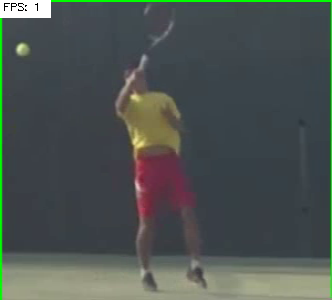

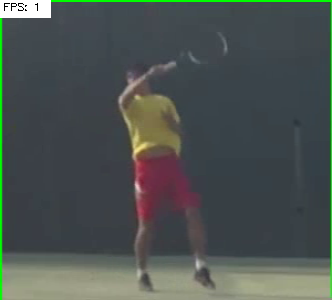

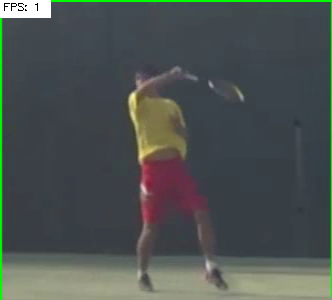

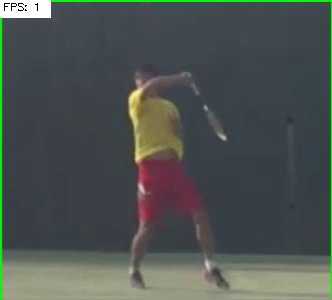

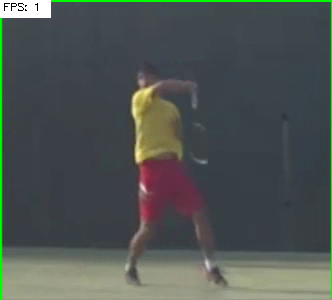

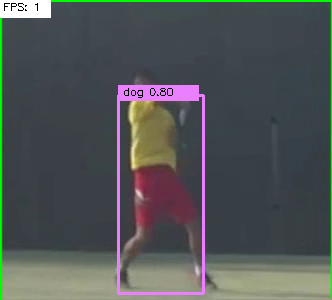

KeyboardInterrupt: ignored

In [ ]:
import keras
import pickle
from google.colab.patches import cv2_imshow
from videotest import VideoTest

import sys
sys.path.append("..")
from ssd import SSD300 as SSD

input_shape = (300,300,3)

# Change this if you run with other classes than VOC
class_names = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"];
NUM_CLASSES = len(class_names)

model = SSD(input_shape, num_classes=NUM_CLASSES)

# Change this path if you want to use your own trained weights
#model.load_weights('../weights_SSD300.hdf5') 
model.load_weights('../checkpoint02/weights.32-1.88.hdf5', by_name=False) 
        
vid_test = VideoTest(class_names, model, input_shape)

# To test on webcam 0, remove the parameter (or change it to another number
# to test on that webcam)
vid_test.run('tennis.mp4')
